import libraries

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

loading data set

In [11]:
divar_df = pd.read_csv('/content/drive/MyDrive/divar_posts_dataset.csv', index_col=[0])
divar_df.drop('id', axis=1, inplace=True)
divar_df.year.replace(to_replace="<1366",value=int("1366"), inplace=True)
divar_df['year'] = pd.to_numeric(divar_df['year'])
print(divar_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 947635 entries, 0 to 947634
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   archive_by_user  947635 non-null  bool   
 1   brand            190892 non-null  object 
 2   cat1             947635 non-null  object 
 3   cat2             945877 non-null  object 
 4   cat3             775301 non-null  object 
 5   city             947635 non-null  object 
 6   created_at       947635 non-null  object 
 7   desc             947635 non-null  object 
 8   image_count      947635 non-null  int64  
 9   mileage          120451 non-null  float64
 10  platform         947635 non-null  object 
 11  price            947635 non-null  int64  
 12  title            947635 non-null  object 
 13  type             98529 non-null   object 
 14  year             120451 non-null  float64
dtypes: bool(1), float64(2), int64(2), object(10)
memory usage: 109.4+ MB
None


remove prices with -1 value and null category objects

In [12]:
divar_df = divar_df.loc[~(divar_df['price'] == -1)]
divar_df = divar_df.loc[~(divar_df['cat3'].isnull())]
divar_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 650276 entries, 0 to 947634
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   archive_by_user  650276 non-null  bool   
 1   brand            167140 non-null  object 
 2   cat1             650276 non-null  object 
 3   cat2             650276 non-null  object 
 4   cat3             650276 non-null  object 
 5   city             650276 non-null  object 
 6   created_at       650276 non-null  object 
 7   desc             650276 non-null  object 
 8   image_count      650276 non-null  int64  
 9   mileage          103799 non-null  float64
 10  platform         650276 non-null  object 
 11  price            650276 non-null  int64  
 12  title            650276 non-null  object 
 13  type             77068 non-null   object 
 14  year             103799 non-null  float64
dtypes: bool(1), float64(2), int64(2), object(10)
memory usage: 75.0+ MB


find outliers and delete them

In [13]:
# finding the 1st quartile
q1 = np.quantile(divar_df['price'], 0.25)
# finding the 3rd quartile
q3 = np.quantile(divar_df['price'], 0.75)
 
# finding the iqr region
iqr = q3-q1
 
# finding upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print(upper_bound, lower_bound)

divar_df = divar_df.loc[~(divar_df['price'] < lower_bound)]
divar_df = divar_df.loc[~(divar_df['price'] > upper_bound)]

divar_df.info()

2405000.0 -1315000.0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 528806 entries, 1 to 947634
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   archive_by_user  528806 non-null  bool   
 1   brand            63865 non-null   object 
 2   cat1             528806 non-null  object 
 3   cat2             528806 non-null  object 
 4   cat3             528806 non-null  object 
 5   city             528806 non-null  object 
 6   created_at       528806 non-null  object 
 7   desc             528806 non-null  object 
 8   image_count      528806 non-null  int64  
 9   mileage          966 non-null     float64
 10  platform         528806 non-null  object 
 11  price            528806 non-null  int64  
 12  title            528806 non-null  object 
 13  type             77068 non-null   object 
 14  year             966 non-null     float64
dtypes: bool(1), float64(2), int64(2), object(10)
memory usage: 61.0+

In [14]:
divar_df['cat1'] = preprocessing.LabelEncoder().fit_transform(divar_df['cat1'])
divar_df['cat2'] = preprocessing.LabelEncoder().fit_transform(divar_df['cat2'])
divar_df['cat3'] = preprocessing.LabelEncoder().fit_transform(divar_df['cat3'])
# divar_df['price'] = preprocessing.StandardScaler().fit_transform(divar_df[['price']]).astype('int')


# divar_df_mod = divar_df.iloc[:10000]
# X = divar_df_mod[["cat1", "cat2", "cat3"]].values
# Y = divar_df_mod[["price"]].values

X = divar_df[["cat1", "cat2", "cat3"]].values
Y = divar_df[["price"]].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0, test_size=0.2)

change shape of labels

In [15]:
Y_test = Y_test.ravel()
Y_train = Y_train.ravel()
Y_train.shape

(423044,)

define classsifier(KNN)

In [16]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, Y_train)
Y_predicted = classifier.predict(X_test)

calculate metrics

In [17]:
print("accuracy:")
print(accuracy_score(Y_test, Y_predicted))

correct = 0
for i in range(len(Y_test)):
  alpha = 0.3
  max_price = Y_test[i] * (1 + alpha)
  min_price = Y_test[i] * (1 - alpha)
  if min_price < Y_predicted[i] < max_price:
    correct += 1

print("telorance accuracy:")
print(correct / len(Y_test))

# print("classification report:")
# print(classification_report(Y_test, Y_predicted))

accuracy:
0.037442559709536506
telorance accuracy:
0.16288458992832966


Comparing Error Rate with the K Value

Text(0, 0.5, 'Mean Error')

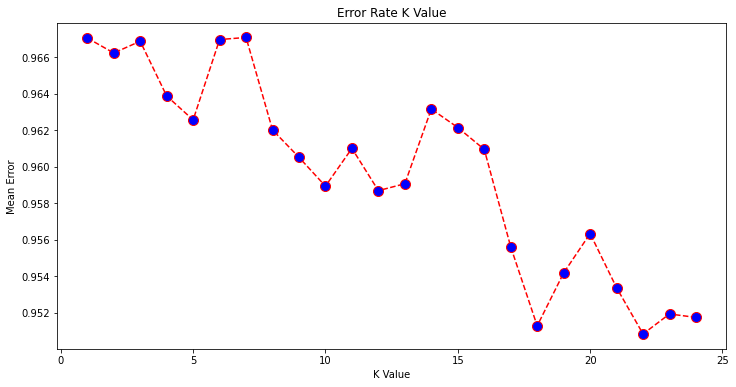

In [18]:
error = []

# Calculating error for K values between 1 and 25
for i in range(1, 25):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != Y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 25), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')